In [ ]:
!pip install whisper git+https://github.com/openai/whisper.git
!pip install langchain_openai
!pip install langchain_core
!pip install langchain_community
#!pip install bleurt git+https://github.com/google-research/bleurt.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-21j1bsvp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-21j1bsvp
  Resolved https://github.com/openai/whisper.git to commit 173ff7dd1d9fb1c4fddea0d41d704cfefeb8908c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.2 MB/s eta 0:00:00
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=0c0444607b04a5aad67e6bbf78e4f7d97fbb01ae4221f80f6dc31e511d4886c5
  Stored in directory: /root/.cache/pip/wheels/aa/7c/1d/015619716e2facae6631312503baf3c3220e6a9a3508cb14b6
  Created wheel for openai-

In [ ]:
import os
import whisper
from whisper.utils import get_writer
import matplotlib.pyplot as plt
#from bleurt import score

In [ ]:
model = whisper.load_model("base")

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 115MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [ ]:
input_directory = "/content/drive/MyDrive/audio_files"
actual_directory = "/content/drive/MyDrive/Clean_Transcripts"
output_directory = "./transcriptions"
os.makedirs(output_directory, exist_ok=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
embed = OpenAIEmbeddings(
    model='text-embedding-ada-002',
    openai_api_key="sk-proj-..."
)


<ipython-input-6-81a4a0ba445d>:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embed = OpenAIEmbeddings(


In [ ]:
from dataclasses import replace
from sklearn.metrics.pairwise import cosine_similarity

s=[]
name=[]
for filename in os.listdir(input_directory):
    if filename.endswith(".mp3") or filename.endswith(".wav"):
        audio_path = os.path.join(input_directory, filename)
        print(f"Processing {filename}")
        name.append(filename)
        result = model.transcribe(audio_path)
        txt_writer = get_writer("txt", output_directory)
        txt_writer(result, audio_path)
        fname=filename.replace(".mp3",".txt")
        with open(os.path.join(actual_directory,fname), 'r') as f:
            references = f.read()
        candidates = result["text"]#.replace("\n", "")
        #candidates = candidates.replace(".", "")
        #candidates = candidates.replace(",", "")
        candidates = candidates.replace("?", "")

        #references = references.replace(".", "")
        #references = references.replace(",", "")
        #references = references.replace("?", "")
        #references = references.replace("\n", "")
        #references = references.replace("D:", "")
        #references = references.replace("P:", "")
        print(f"Completed: {filename}")
        #checkpoint = "bleurt/test_checkpoint"
        #scorer = score.BleurtScorer()
        #scores = scorer.score(references=references, candidates=candidates)
        s.append(cosine_similarity([embed.embed_query(references)],[embed.embed_query(candidates)]))
        #average_score = sum(scores) / len(scores)
        #print(f"Average BLEURT score: {average_score}")

Processing CAR0004.mp3


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Completed: CAR0004.mp3
Processing CAR0002.mp3


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Completed: CAR0002.mp3
Processing CAR0005.mp3


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Completed: CAR0005.mp3
Processing CAR0001.mp3


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Completed: CAR0001.mp3
Processing CAR0003.mp3


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Completed: CAR0003.mp3
Processing GAS0001.mp3


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Completed: GAS0001.mp3
Processing GAS0002.mp3


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
x = [item for sublist in s for item in sublist]
x=[i[0] for i in x]
a=zip(x,name)
#list(s.values())[0][0][0]
b=pd.DataFrame(a)
b

,0,1
0,0.954943,CAR0004.mp3
1,0.935979,CAR0002.mp3
2,0.973532,CAR0005.mp3
3,0.963133,CAR0001.mp3
4,0.972777,CAR0003.mp3
5,0.948720,GAS0001.mp3


<BarContainer object of 6 artists>

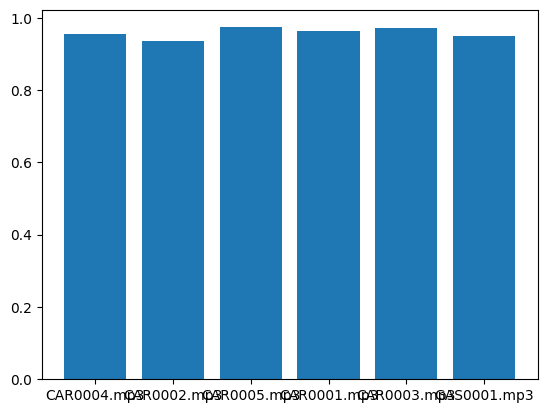

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(b[1],b[0])

<Axes: xlabel='0', ylabel='Density'>

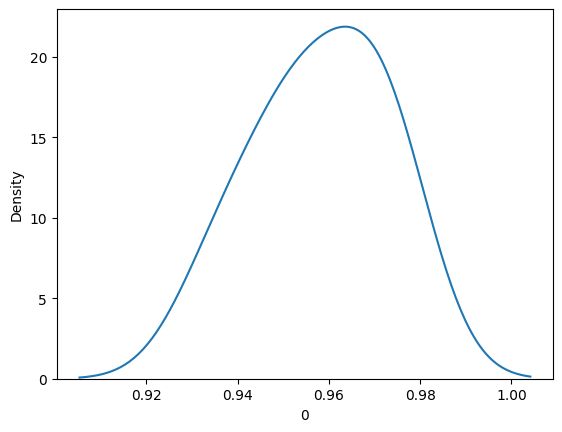

In [ ]:
import seaborn as sns
sns.kdeplot(b[0])

In [ ]:
import numpy as np
from scipy import stats

# Sample data (for example, daily sales in dollars)
sample_data = b[0]

# Population mean (for example, average sales)
population_mean = 0.95

# Conduct a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

# Convert to one-tailed p-value for the condition sample mean >= population mean
if t_statistic > 0:  # Check if sample mean is greater than or equal to population mean
    one_tailed_p_value = p_value / 2
else:
    one_tailed_p_value = 1 - (p_value / 2)

# Output the result
print(f"T-statistic: {t_statistic}")
print(f"One-tailed p-value: {one_tailed_p_value}")

# Check if we reject or fail to reject the null hypothesis at a significance level, e.g., 0.05
alpha = 0.05
if one_tailed_p_value < alpha:
    print("Reject the null hypothesis: Sample mean is significantly greater than or equal to the population mean of 95%.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the sample mean is greater than or equal to the population mean of 95%.")


T-statistic: 1.372296687760657
One-tailed p-value: 0.11416661007883588
Fail to reject the null hypothesis: No significant evidence that the sample mean is greater than or equal to the population mean of 95%.
